# Smrtnost

Smrtnost v sloveniji.
Veliko je bilo govora o smrtnosti, češ da vsak, ki umre okužen z covidom, je umrl zaradi njega. Tukaj preizkušava to tezo.

In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data

ageDeceased = pd.read_csv("data/csv/age-deceased.csv")
dailyDeaths = pd.read_csv("data/csv/daily_deaths_slovenia_by_age.csv")

To sva se lotila tako, da izračunava pričakovano smrtnost in nato primerjava, če se presežek ujema z številom žrtev covida.

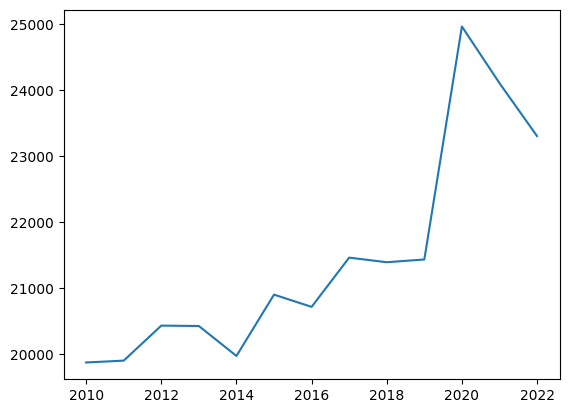

In [3]:
sloveniansDeadByYear = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for x in dailyDeaths.values:
    sloveniansDeadByYear[int((x[0][0:4])) - 2010] += int(sum(x[x==x][1:]))

plt.plot(years, sloveniansDeadByYear[0:-1])

Ta graf pokaže, da se je smrtnost do 2019 nagibala med 20 in 21.5 tisoč letno. Leta 2020 pa dosegla 25in padla na 23.3 tisoč leta 2022.

Realne vrednosti:
[19867, 19895, 20426, 20420, 19966, 20896, 20710, 21457, 21387, 21429, 24962, 24103, 23300]
Pričakovane vrednosti:
[19867, 20039, 20212, 20387, 20563, 20741, 20920, 21101, 21283, 21467, 21653, 21840, 22029]
Povprečna napaka:
14.11


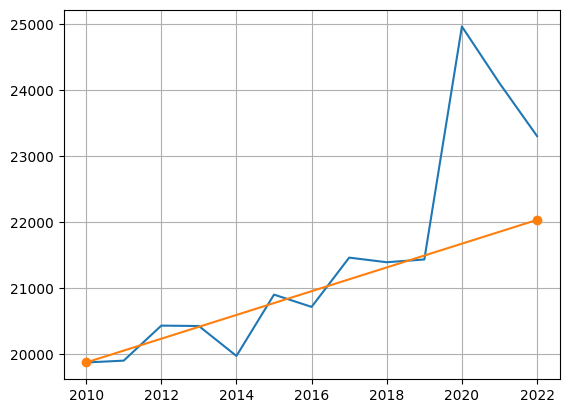

In [4]:
plt.plot(years, sloveniansDeadByYear[0:-1])

print("Realne vrednosti:")
print(sloveniansDeadByYear[0:-1])

razlikaLet = []
prejsni = sloveniansDeadByYear[0]
for leto in sloveniansDeadByYear[1:-4]:
    procent = (leto - prejsni) / prejsni
    razlikaLet.append(procent)
    prejsni = leto

# za 0.87% se visa slovenka smrtnost
povprecnaRast = sum(razlikaLet) / (len(razlikaLet))

y2 = [int(sloveniansDeadByYear[0])]
for i in range(12):
    y2.append(int(y2[i] + (y2[i] * povprecnaRast)))

print("Pričakovane vrednosti:")
print(y2)

print("Povprečna napaka:")
# 12.7
print(round(abs(sum([sloveniansDeadByYear[i] - y2[i] for i in range(1, 10)]) / 9), 2))


x, y = [2010, 2022], [y2[0], y2[-1]]
plt.plot(x, y, marker = 'o')
plt.grid()

Sedaj poskušava ustvariti napoved, koliko ljudi bo umrlo, glede na prejšna normalna leta. To naredimo tako, da izračunamo povprečje padeca/rasti vsakega leta glede na prejšnje, ki se izkaže da je `0,87%` letno. Iz tega naredimo linearno enačbo, ki je prikazana na grafu.

Naša ugotovitev: Za leto 2020 je predvidenih 21653 smrti, a bilo jih je 24962, kar je 3309 ljudi preveč. 

Da bomo še bolj natačni, smo izračunali še povprečno napako, ki znaša `~14` ljudi. Torej po teh podatkih, naj bi za covidom leta 2020 umrlo maksimalno `3323` ljudi.

[3026, 3110, 2725, 340]


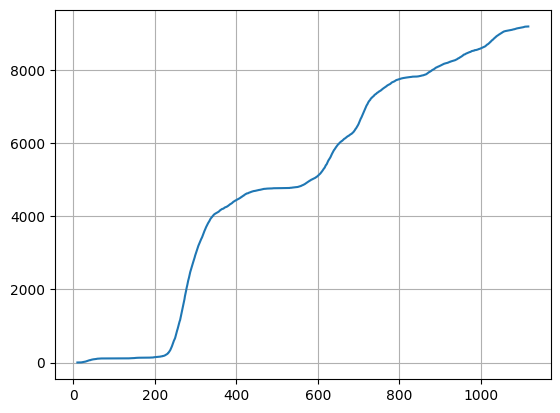

In [5]:
covidYears = [2020, 2021, 2022, 2023]

# colud do better but no need
deceasedByYear = list()
leto2020 = int(ageDeceased.loc[ageDeceased["date"] == '2020-12-31', "deceased.todate"].max())
leto2021 = int(ageDeceased.loc[ageDeceased["date"] == '2021-12-31', "deceased.todate"].max()) - leto2020
leto2022 = int(ageDeceased.loc[ageDeceased["date"] == '2022-12-31', "deceased.todate"].max()) - leto2020 - leto2021
leto2023 = int(ageDeceased.loc[ageDeceased["date"] == '2023-03-26', "deceased.todate"].max()) - leto2020 - leto2021 - leto2022

deceasedByYear.append(leto2020)
deceasedByYear.append(leto2021)
deceasedByYear.append(leto2022)
deceasedByYear.append(leto2023)

print(deceasedByYear)

plt.plot( ageDeceased["deceased.todate"])
plt.grid()

# plt.plot(covidYears, deceasedByYear)

Sedaj potrebujemo število žrtev covida na leto.

`Končno lahko primerjamo smrtnost kovidnih let, z pričakovano smrtnostjo + število zabeleženih smrti posledic kovida.`

Dejanska smrtnost
[21429, 24962, 24103, 23300]

Umrli zaradi covida:
[0, 3026, 3110, 2725]
Pričakovano število umrlih:
[21467, 21653, 21840, 22029]

Pričakovana smrtnost:
[21467, 24679, 24950, 24754]


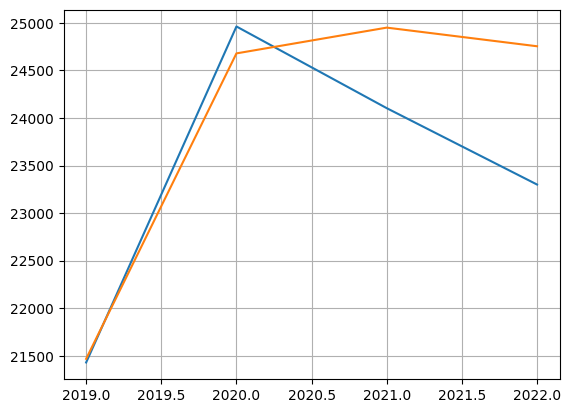

In [6]:
# plot for real deaths
plt.plot(years[9:], sloveniansDeadByYear[9:-1])

print("Dejanska smrtnost")
print(sloveniansDeadByYear[9:-1])
print()

print("Umrli zaradi covida:")
print([0] + deceasedByYear[:-1])

print("Pričakovano število umrlih:")
print(y2[9:])

expectedDeaths = [x + y for x, y in zip([0] + deceasedByYear[:-1], y2[9:])]

print()
print("Pričakovana smrtnost:")
print(expectedDeaths)

# plot for expected deaths + registered covid deaths
plt.plot(years[9:], expectedDeaths)
plt.grid()

### Ugotovitve

Na grafu so relevantne vrednosti v letih 2020/21/22, kjer nam modra črta pove dejansko smrtnost in oranžna pričakovano smrtnost + število umrlih zaradi covida.

Podatki kot vidimo so dokaj zanimivi:
-  2020: Umrlo nekaj 100 več ljudi kot bi pričakovali. Torej so v prvem letu dokaj konzervativno in korektno ocenili smrtnost o covidu.
-  2021: V tem letu je največ ljudi umrlo za kovidom. Razlika v grafu je `847` ljudi, kar je že kar veliko ljudi, katerih vzrok smrti je bil napačno ocenjen.
-  2022: Zadnje leto korone, pa očitno niso več kaj dosti komplicirali. Razlika je kar `1454` ljudi, kar predstavlja 6% vseh umrlih in je relativno velika napaka.

Dejanska smrtnost
[21429, 24962, 24103, 23300]

Pričakovano število umrlih:
[21467, 21653, 21840, 22029]
Dodatek:
[3309, 2263, 1271]


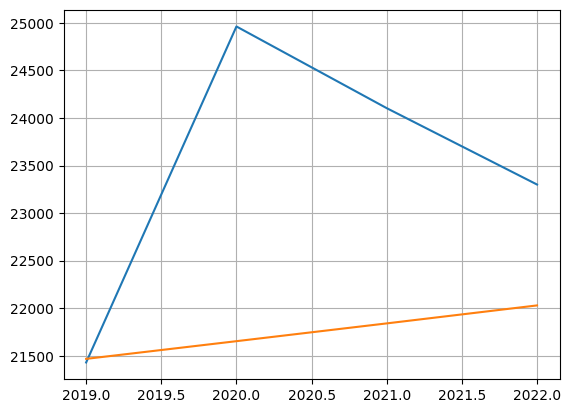

In [7]:
# plot for real deaths
plt.plot(years[9:], sloveniansDeadByYear[9:-1])

print("Dejanska smrtnost")
print(sloveniansDeadByYear[9:-1])
print()

print("Pričakovano število umrlih:")
print(y2[9:])

print("Dodatek:")
print([x - y for x, y in zip(sloveniansDeadByYear[9:-1], y2[9:])][1:4])


# plot for expected deaths + registered covid deaths
plt.plot(years[9:], y2[9:])
plt.grid()


Še zadnji graf pa predstvalja koliko ljudi pa naj bi umrlo. To izračunamo iz pričakovane smrtnosti, ter dejasnke smrtnosti, čeprav ta podatek ni točen in se ga ne da izračunati, pa je verjetno dokaj dober približek.

Rezultat je 2020:`3309`, 2021: `2263`, 2022:`1271`... skupno `6843` ljudi. Uraden podatek je `9201` (razlika je ~2359 ljudi).